# 10. Calculus, Continuity, and Topology

In [1]:
from sympy import (
    Abs,
    And,
    Circle,
    ConditionSet,
    Eq,
    Equivalent,
    Function,
    Implies,
    Interval,
    Max,
    Point,
    Reals,
    sqrt,
    symbols
)
from sympy.diffgeom import Manifold
from sympy.plotting import (
    plot,
    plot3d,
    plot_implicit
)

In [2]:
delta, epsilon, x, a = symbols(r"\delta, \epsilon, x, a")
delta

\delta

In [3]:
epsilon

\epsilon

In [4]:
f = Function("f", real = True)
f

f

In [5]:
C = Implies(
    Abs(x - a) < delta,
    Abs(f(x) - f(a)) < epsilon
)
C # Class of continuous functions C where this always holds True

Implies(Abs(a - x) < \delta, Abs(f(a) - f(x)) < \epsilon)

In [6]:
b, y = symbols("b y") # center
epsilon # radius
start = b - epsilon
end = b + epsilon
I_epsilon = Interval(start, end, True, True)
I_epsilon

Interval.open(-\epsilon + b, \epsilon + b)

In [7]:
I_epsilon_alt = ConditionSet(y, Abs(y - b) < epsilon, Reals)
I_epsilon_alt

ConditionSet(y, Abs(b - y) < \epsilon, Reals)

In [8]:
Eq(I_epsilon, I_epsilon_alt)

Eq(Interval.open(-\epsilon + b, \epsilon + b), ConditionSet(y, Abs(b - y) < \epsilon, Reals))

In [9]:
I_epsilon_interval = I_epsilon.subs([(b, 2), (epsilon, 1)])
I_epsilon_interval

Interval.open(1, 3)

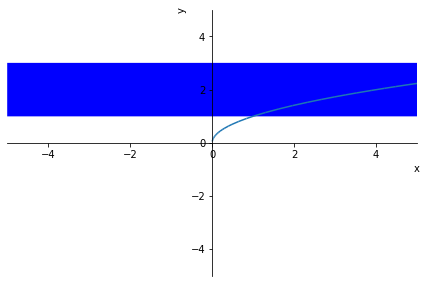

In [10]:
x = symbols("x")
f = sqrt

p1 = plot_implicit(
    And(y >= I_epsilon_interval.left, y <= I_epsilon_interval.right),
    x_var = x,
    show = False
)

p2 = plot(f(x), show = False)

p1.append(p2[0])
p1.show()

In [11]:
#inverse image of I under f
f = Function("f", real = True)
ConditionSet(x, I_epsilon.contains(f(x)), Reals)

ConditionSet(x, (f(x) < \epsilon + b) & (-\epsilon + b < f(x)), Reals)

In [12]:
x, y, a, b = symbols("x, y, a, b")

lft = Point(x, y).distance(Point(a, b))
p1 = sqrt((x - a)**2 + (y - b)**2)

Equivalent(lft, p1)

True

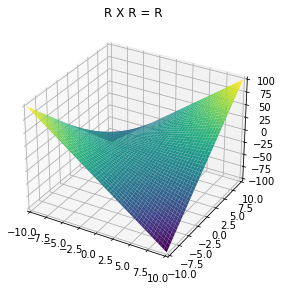

In [13]:
# Plotting R * R = R
r1, r2 = symbols("r1 r2")
plot3d(r1 * r2, title = "R X R = R")

In [14]:
p1

sqrt((-a + x)**2 + (-b + y)**2)

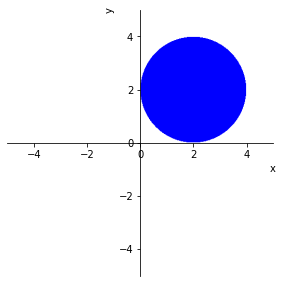

In [15]:
plot_implicit(p1.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [16]:
a, b, delta = symbols(r"a, b, \delta")

open_disc = Circle(Point(a, b), delta)
print(open_disc) # print because of sympy error #20577

Circle(Point2D(a, b), \delta)


In [17]:
Equivalent(
    open_disc,
    (x - a)**2 + (y - b)**2 < delta**2
)

Equivalent(Circle(Point2D(a, b), \delta), (-a + x)**2 + (-b + y)**2 < \delta**2)

In [18]:
# Shortest path along the rectangular grid:
p2 = abs(x - a) + abs(y - b)
p2

Abs(a - x) + Abs(b - y)

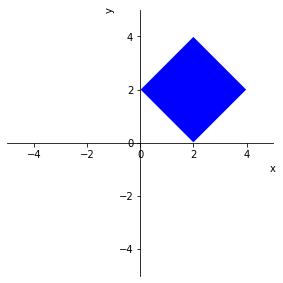

In [19]:
plot_implicit(p2.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [20]:
p3 = Max(abs(x - a), abs(y - b))
p3

Max(Abs(a - x), Abs(b - y))

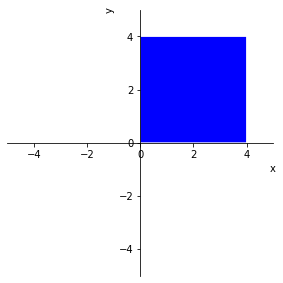

In [21]:
plot_implicit(p3.subs([(a, 2), (b, 2)]) < 2, aspect_ratio = (1, 1))

In [22]:
x = symbols("x")
f = Function("f", continuous = True)
g = Function("g", continuous = True)

gf = g(f(x))
gf

g(f(x))

In [23]:
gf.continuous

True

In [24]:
X = Manifold("X", 2, structure = "topological")
Y = Manifold("Y", 2, structure = "topological")

class f(Function):
    @classmethod
    def eval(cls, x):
        return Y
    
result = f(X)
result

Y